In [1]:
#Load libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#scikit learn has a lot of packages we need to analyse data and machine learning
#we will use scikit learn to bring dataset from it, experimental dataset that we can use
from sklearn.datasets import load_iris   # that generate new data frame

In [2]:
#Load iris dataset
data=load_iris()
#create a dataframe for iris
type(data)

sklearn.utils.Bunch

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
#type(data.data)
#type(data.feature_names)
data_df=pd.DataFrame(data.data,columns=data.feature_names)
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
data_df
#4 features and 150 samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
data_df.shape

(150, 4)

In [9]:
data_df['sepal length (cm)'].max()

7.9

In [15]:
# get the maximum value of each column
data_df.max() 

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [16]:
data_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [20]:
data_df['sepal length (cm)'].agg({'max_values':max,'min_values':min})

max_values    7.9
min_values    4.3
Name: sepal length (cm), dtype: float64

**Handle noisy data using binning**

In [21]:
#To sort values in columns
feature_sorted=data_df['sepal length (cm)'].sort_values()

In [22]:
feature_sorted.iloc[0:30]

13     4.3
42     4.4
38     4.4
8      4.4
41     4.5
22     4.6
3      4.6
6      4.6
47     4.6
2      4.7
29     4.7
12     4.8
45     4.8
24     4.8
11     4.8
30     4.8
57     4.9
106    4.9
34     4.9
9      4.9
37     4.9
1      4.9
40     5.0
26     5.0
49     5.0
35     5.0
43     5.0
60     5.0
7      5.0
93     5.0
Name: sepal length (cm), dtype: float64

In [23]:
type(feature_sorted)

pandas.core.series.Series

**we want to divide data to bins , lets say 5 bins , equal frequent binning each bins of 5 samples, we will have 30 elements in one bin (150/5)**

**We will do smoothing by the mean of the bin**

In [47]:
feature_binned=feature_sorted.copy()

for bin_number in range(5):
  start_index=bin_number*30
  end_index=start_index+30
  #print(start_index , end_index)
  mean=round(feature_sorted.iloc[start_index:end_index].mean(), 2)
  print('Bin',bin_number,'has mean of',mean)
  feature_binned.iloc[start_index:end_index]=mean



Bin 0 has mean of 4.77
Bin 1 has mean of 5.28
Bin 2 has mean of 5.8
Bin 3 has mean of 6.31
Bin 4 has mean of 7.05


**The aim of the previous code is to replce the original noisy value with the "mean" the smooth values(The discretized one)**

In [48]:
feature_binned[0:30]
type(feature_binned)

pandas.core.series.Series

In [58]:
#Concat two features column wise in a new dataframe. cols wise
feature_merged=pd.concat([feature_sorted,feature_binned ], axis=1)

In [60]:
feature_merged.tail(30)
#we replace all values , discretization

,sepal length (cm),sepal length (cm)
58,6.6,7.05
75,6.6,7.05
86,6.7,7.05
140,6.7,7.05
108,6.7,7.05
77,6.7,7.05
65,6.7,7.05
144,6.7,7.05
145,6.7,7.05
124,6.7,7.05


array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

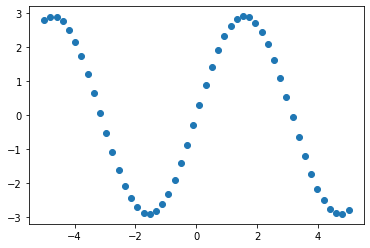

In [61]:
#Dataset generation 
#numpy line space give us values like range starts at -5 and ends at 5 
#it gives me 50 elements. 50 intervals, 50 observations with the same space between each others
#it estimates how much the space should be between the start and ends of the interval so that we 
# have 50 intervals
x_data=np.linspace(-5,5,num=50)
y_data=2.9*np.sin(x_data)

plt.figure(figsize=(6,4))
plt.scatter(x_data,y_data)
x_data

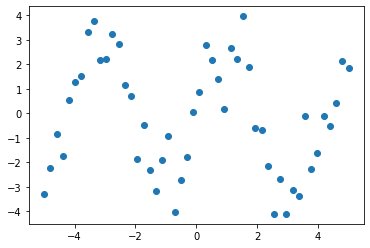

In [63]:
#Dataset generation 
#numpy line space give us values like range starts at -5 and ends at 5 
#it gives me 50 elements. 50 intervals, 50 observations with the same space between each others
#it estimates how much the space should be between the start and ends of the interval so that we 
# have 50 intervals
x_data=np.linspace(-5,5,num=50)
y_data=2.9*np.sin(1.5*x_data)+np.random.normal(size=50)
plt.figure(figsize=(6,4))
plt.scatter(x_data,y_data)
plt.show()

In [64]:
x_data

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [65]:
y_data

array([-3.28922324, -2.22866813, -0.84838678, -1.75629898,  0.52815957,
        1.28178394,  1.54018101,  3.30606304,  3.77189792,  2.19469282,
        2.20177002,  3.22138314,  2.82464495,  1.14228905,  0.71046717,
       -1.85312922, -0.45666569, -2.32977152, -3.17797299, -1.9077756 ,
       -0.92510465, -4.0322447 , -2.70401662, -1.79954715,  0.04913321,
        0.87716359,  2.80163206,  2.17472553,  1.39691166,  0.17114286,
        2.65161339,  2.20731499,  3.95946082,  1.87960551, -0.59858561,
       -0.69341124, -2.15946734, -4.08854032, -2.66797238, -4.10274882,
       -3.13840975, -3.37206928, -0.0997486 , -2.2900955 , -1.59855149,
       -0.09721267, -0.52669782,  0.43022185,  2.12951399,  1.86144333])

**have 10 bins each of 5 elements**
data when on x scale it is already ordered , because it is 2d array it is ordered based on the x-axis. if the second dimension based on the first one , x is already ordered ot if data is time series or based on x-axis it is sorted already

In [70]:
feature_binned=y_data.copy()
for bin_number in range(25):
  start_index=bin_number*2
  end_index=start_index+2
  mean=feature_binned[start_index:end_index].mean().round(3)
  feature_binned[start_index:end_index]=mean #replacement for orginal values
  print('Bin number',bin_number,'has mean of ',mean)

feature_binned

Bin number 0 has mean of  -2.759
Bin number 1 has mean of  -1.302
Bin number 2 has mean of  0.905
Bin number 3 has mean of  2.423
Bin number 4 has mean of  2.983
Bin number 5 has mean of  2.712
Bin number 6 has mean of  1.983
Bin number 7 has mean of  -0.571
Bin number 8 has mean of  -1.393
Bin number 9 has mean of  -2.543
Bin number 10 has mean of  -2.479
Bin number 11 has mean of  -2.252
Bin number 12 has mean of  0.463
Bin number 13 has mean of  2.488
Bin number 14 has mean of  0.784
Bin number 15 has mean of  2.429
Bin number 16 has mean of  2.92
Bin number 17 has mean of  -0.646
Bin number 18 has mean of  -3.124
Bin number 19 has mean of  -3.385
Bin number 20 has mean of  -3.255
Bin number 21 has mean of  -1.195
Bin number 22 has mean of  -0.848
Bin number 23 has mean of  -0.048
Bin number 24 has mean of  1.995


array([-2.759, -2.759, -1.302, -1.302,  0.905,  0.905,  2.423,  2.423,
        2.983,  2.983,  2.712,  2.712,  1.983,  1.983, -0.571, -0.571,
       -1.393, -1.393, -2.543, -2.543, -2.479, -2.479, -2.252, -2.252,
        0.463,  0.463,  2.488,  2.488,  0.784,  0.784,  2.429,  2.429,
        2.92 ,  2.92 , -0.646, -0.646, -3.124, -3.124, -3.385, -3.385,
       -3.255, -3.255, -1.195, -1.195, -0.848, -0.848, -0.048, -0.048,
        1.995,  1.995])

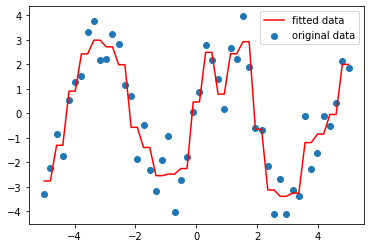

In [76]:
plt.figure(figsize=(6,4))
plt.scatter(x_data,y_data,label='original data')
plt.plot(x_data,feature_binned,c='r',label="fitted data")
plt.legend(loc="best")
#we generated regression line using binning

**Smoothing uisng regression line**

another way to generate a regression line

In [77]:
#a+sin(x) # we know x but we dont know a, we want to find a so that the line will be closest to data
# The process of selecting parameters to match observations is called model fitting.

In [78]:
from scipy import optimize

In [79]:
def model_hypothesis(x,a):
  return np.sin(x)+a

In [80]:
params = optimize.curve_fit(model_hypothesis, x_data, y_data)

print(params[0])

[-0.14858201]


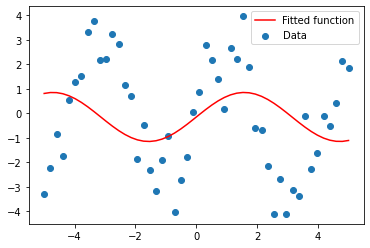

In [81]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, model_hypothesis(x_data, params[0]), 
         label='Fitted function',
        c='r')

plt.legend(loc='best')

plt.show()

In [82]:
x_data[0]

-5.0

In [83]:
y_data[0]

-3.2892232434374944

In [84]:
model_hypothesis(x_data[0],params[0])

array([0.81034226])